# Beer Recommendation System

**Problem Statement**<br>
You are the sales manager for "BeerMart", an online beer store in the United States. You want to build a recommendation system (collaborative) for your store, where customers will be recommended the beer that they are most likely to buy. You collect data about the ratings that the customers have given in the past. 

## Loading libraries

In [1]:
# Import necessary modules for data analysis and data visualization. 
import pandas as pd
import numpy as np
import plotly.express as px
# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
## Some other snippit of codes to get the setting right 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [2]:
#creating a function for count of missing values and % of missing values for d1 dataframe
def missing_data(d1):
    missing_data1 = pd.DataFrame(round(d1.isnull().sum().sort_values(ascending=False)/len(d1.index)*100,2), columns=['% of missing value'])
    missing_data1['Count of Missing Values'] = d1.isnull().sum()
    return missing_data1

## Data Loading and Preprocessing

In [3]:
# loading the datset
beer = pd.read_csv('beer_data.csv')

In [4]:
#checking the head of the data
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [5]:
#checking the shape of the data
beer.shape

(475984, 3)

In [6]:
#cheking the info
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [7]:
#checking the missing data
missing_data(beer)

,% of missing value,Count of Missing Values
review_profilename,0.02,100
review_overall,0.00,0
beer_beerid,0.00,0


As we can see 100 values are missing, since we have large amount of data , removing them wont affect our results.

In [8]:
#getting the index where review_profilename is null
ind = beer[beer.review_profilename.isnull()].index

In [9]:
#removing the rows where data is not present
beer.drop(ind, inplace=True)
beer.reset_index(inplace=True)
beer.head()

,index,beer_beerid,review_profilename,review_overall
0,0,48215,stcules,3.0
1,1,52159,oline73,3.0
2,2,52159,alpinebryant,3.0
3,3,52159,rawthar,4.0
4,4,52159,RangerClegg,3.5


In [10]:
beer.drop('index',axis=1, inplace=True)

In [11]:
#checking the no of unnique entries
beer.nunique()

beer_beerid           40304
review_profilename    22497
review_overall           10
dtype: int64

As we can see we have 40308 unique beers which are rated by 22497 reviewers

In [12]:
#checking the duplicate rows
beer[beer.duplicated()]

,beer_beerid,review_profilename,review_overall
2301,73647,barleywinefiend,4.5
2349,14243,northyorksammy,2.5
2608,1122,Slatetank,4.0
3294,962,RedDiamond,3.5
3337,961,Offa,4.0
...,...,...,...
472326,958,barleywinefiend,3.0
472448,34563,beveritt,3.5
472461,16790,beveritt,4.0
474811,49070,Bitterbill,4.0


In [13]:
#as we can see we have 580 duplicate rows, so removing them
beer.drop_duplicates(inplace=True)

In [14]:
#checking the duplicate rows again
beer[beer.duplicated()]

,beer_beerid,review_profilename,review_overall


## EDA

In [15]:
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


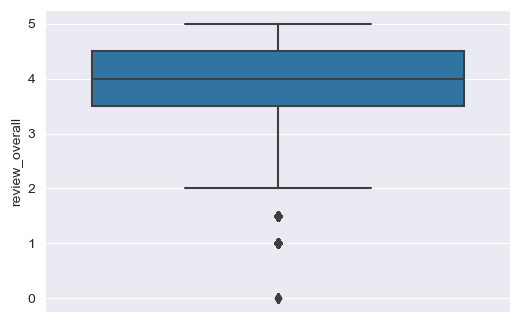

In [16]:
#checking the distribution of review_overall
plt.figure(dpi=100)
sns.boxplot(y = beer.review_overall)
plt.show()

### Data Preperation

Choose only those beers that have at least N number of reviews.<br>
Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.

In [17]:
#checking the number of ratings per beer
beer_ratings = pd.DataFrame(beer.beer_beerid.value_counts())
beer_ratings.head()

,beer_beerid
2093,980
412,972
1904,903
1093,845
92,817


In [18]:
#reseting the index and changing the name of columns
beer_ratings.reset_index(inplace=True)
beer_ratings.rename(columns={'index':'beer_id','beer_beerid':'rating_count'}, inplace=True)
beer_ratings.head()

,beer_id,rating_count
0,2093,980
1,412,972
2,1904,903
3,1093,845
4,92,817


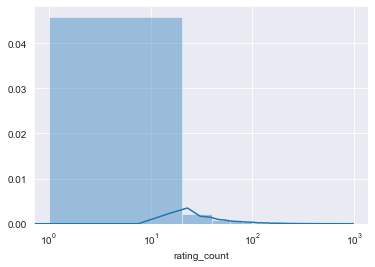

In [19]:
#checking the distribution of rating count
sns.distplot(beer_ratings.rating_count)
plt.xscale('log')
plt.show()

In [20]:
#checking the distribution of rating count
beer_ratings.rating_count.describe(percentiles=[.1,.2,.5,.7,.75,.8,.9,.92,.95,.98,.99,1])

count    40304.000000
mean        11.792973
std         42.007656
min          1.000000
10%          1.000000
20%          1.000000
50%          2.000000
70%          4.000000
75%          5.000000
80%          7.000000
90%         21.000000
92%         28.000000
95%         51.000000
98%        122.000000
99%        195.000000
100%       980.000000
max        980.000000
Name: rating_count, dtype: float64

From the above data we can see that we should select those beers who are having minimum of 20 ratings.

In [21]:
#lets see no of beers having ratings more than and equal to 20
beer_ratings[beer_ratings.rating_count >= 20]

,beer_id,rating_count
0,2093,980
1,412,972
2,1904,903
3,1093,845
4,92,817
...,...,...
4251,47463,20
4252,58905,20
4253,63156,20
4254,48555,20


As we can see we have more than 4200 beers which have ratings more than 20, so we will consider only these beers

In [22]:
#getting beerids of beers having more than or equal to 20 ratings
beer_ids = beer_ratings[beer_ratings.rating_count >= 20]['beer_id']

In [23]:
#selecting only beers having no of ratings more than or equal to 20
beer = beer[beer.beer_beerid.isin(beer_ids)]

In [24]:
#checking the shape of this new beer dataframe
beer.shape

(364475, 3)

### Data Exploration

1. What are the unique values of ratings?

In [25]:
beer.nunique()

beer_beerid            4256
review_profilename    20680
review_overall            9
dtype: int64

In [26]:
#checking the unique value of ratings
sorted(beer.review_overall.unique())

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

As we can see we have 9 unique values of ratings ranging from 1.0 to 5.0

2. Visualise the rating values and notice:
    - The average beer ratings
    - The average user ratings
    - The average number of ratings given to the beers
    - The average number of ratings given by the users

In [27]:
#average beer ratings
np.mean(beer.groupby('beer_beerid')['review_overall'].mean())

3.7749328732440266

In [28]:
#average user ratings
np.mean(beer.groupby('review_profilename')['review_overall'].mean())

3.93018249171174

In [29]:
#average no of ratings given to the beer
np.mean(beer.groupby('beer_beerid')['beer_beerid'].count())

85.63792293233082

In [30]:
#average no of ratings given by the user
np.mean(beer.groupby('review_profilename')['review_profilename'].count())

17.624516441005802

## Modelling

### Dividing the dataset into train and test

In [31]:
beer.head()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
18,25414,NJpadreFan,4.0
19,25414,vacax,2.5
20,25414,mikesgroove,4.0
21,25414,hdofu,4.0


In [32]:
#split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(beer, test_size=0.30, random_state=31)

In [33]:
print(train.shape)
print(test.shape)

(255132, 3)
(109343, 3)


In [34]:
# pivot the data into beer_features
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall',
    fill_value=0)

In [35]:
#checking the shape
beer_features.shape

(18178, 4256)

In [36]:
#checking the head
beer_features.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset

These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the beers which has not been rated by the user. To ignore the beers rated by the user, we will mark it as 0 during prediction. The beers not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [37]:
dummy_train = train.copy()
dummy_test = test.copy()

In [38]:
#changing values to 0 and 1 based on the rules above
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [39]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall',
    fill_value= 1)

# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall',
    fill_value= 0)

## User Similarity Matrix

#### Using Cosine Similarity

In [40]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [41]:
user_correlation.shape

(18178, 18178)

#### Using adjusted Cosine 

Here, not removing the NaN values and calculating the mean only for the beers rated by the user

In [42]:
#creating the train dataframe again
beer_features_1 = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [43]:
beer_features_1.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Normalising the rating of the beer for each user aroung 0 mean

In [44]:
mean = np.nanmean(beer_features_1, axis=1)
df_subtracted = (beer_features_1.T-mean).T

In [45]:
df_subtracted.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Finding adjusted cosine similarity

In [46]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [47]:
user_correlation.shape

(18178, 18178)

Determine how similar the first 10 users are to each other and visualise it

In [48]:
#slicing for first 10 users
first_10_user = user_correlation[:10,:10]

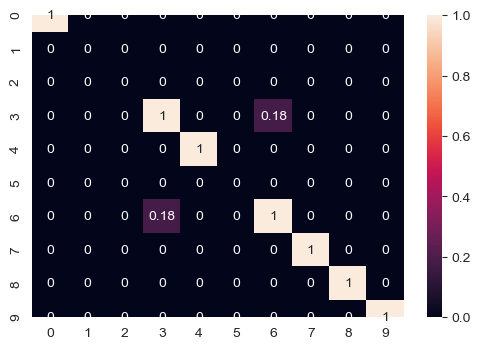

In [92]:
#checking the correlation among them
plt.figure(dpi=100)
sns.heatmap(first_10_user, annot=True)
plt.show()

As we can see we have some correlation of user 4 with user 7

### Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [49]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Rating predicted by the user (for beers rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset). 

In [50]:
user_predicted_ratings = np.dot(user_correlation, beer_features_1.fillna(0))
user_predicted_ratings

array([[1.18244242, 2.55795871, 1.71964535, ..., 2.0671261 , 1.37801967,
        0.56435711],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.80003557, 1.62887852, 2.21877022, ..., 0.08619877, 0.59919829,
        0.        ],
       [0.1682518 , 5.89003291, 3.06398731, ..., 0.        , 1.65847645,
        0.02893921]])

In [51]:
user_predicted_ratings.shape

(18178, 4256)

Since we are interested only in the beers not rated by the user, we will ignore the beers rated by the user by making it zero. 

In [52]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.182442,2.557959,1.719645,0.502519,0.266772,2.049708,0.186944,0.040888,0.276982,0.452979,...,0.965768,0.700817,0.398613,0.120390,1.379414,0.787486,2.680475,2.067126,1.378020,0.564357
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.056769,3.142892,2.142663,0.317305,0.081123,3.302263,0.048020,0.031072,0.228071,0.737875,...,0.653470,1.614945,0.486533,1.036711,0.677990,1.867341,6.536365,2.075731,2.318730,1.050252
0beerguy0,0.562421,2.293032,0.898325,0.519310,0.000000,2.194530,0.053718,0.144822,0.149932,1.126728,...,0.428906,0.263696,0.019324,0.261731,0.215301,0.002897,0.116457,0.187123,0.234862,0.250498


### Finding the top 5 recommendation for the user 1 

In [53]:
user_final_rating.iloc[0].sort_values(ascending=False)[0:5]

beer_beerid
7971     22.057847
645      18.630846
412      16.761231
19960    16.125919
17112    15.992458
Name: 0110x011, dtype: float64

## Item Based Similarity

Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different beer id. In the user based similarity, we had taken mean for each user intead of each beer. 

In [54]:
beer_features_1 = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features_1.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,...,zuffenhausen,zuggy9,zulufactor,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the beer rating for each beer

In [55]:
mean = np.nanmean(beer_features_1, axis=1)
df_subtracted = (beer_features_1.T-mean).T

In [56]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,...,zuffenhausen,zuggy9,zulufactor,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [57]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.01562584  0.01211138 ...  0.          0.01540869
   0.        ]
 [-0.01562584  1.         -0.01878745 ...  0.03727192 -0.00331617
   0.        ]
 [ 0.01211138 -0.01878745  1.         ...  0.         -0.01046676
  -0.01479061]
 ...
 [ 0.          0.03727192  0.         ...  1.         -0.11488183
   0.        ]
 [ 0.01540869 -0.00331617 -0.01046676 ... -0.11488183  1.
   0.        ]
 [ 0.          0.         -0.01479061 ...  0.          0.
   1.        ]]


Compute and visualise the similarity between the first 10 beers

In [58]:
#slicing the data for first 10 beers
first_10_beer = item_correlation[:10,:10]

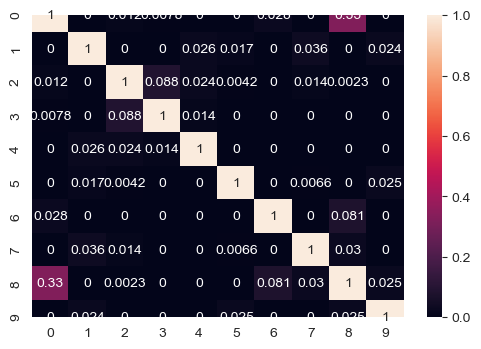

In [91]:
#checking the correlation among them
plt.figure(dpi=100)
sns.heatmap(first_10_beer, annot=True)
plt.show()

As we can see beer 9 is correlated with beer 1

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [59]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.01211138, ..., 0.        , 0.01540869,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.03727192, 0.        ,
        0.        ],
       [0.01211138, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03727192, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01540869, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [60]:
#checking the shape of item correlation
item_correlation.shape

(4256, 4256)

### Prediction

In [61]:
#Multiplying the martices
item_predicted_ratings = np.dot((beer_features_1.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.14525899, 0.65983015, 0.66839251, ..., 2.14337916, 0.94960013,
        0.41936545],
       [0.        , 0.        , 0.11684525, ..., 0.        , 0.02070355,
        0.        ],
       [0.        , 0.11450807, 0.08898361, ..., 0.02949306, 0.0310163 ,
        0.        ],
       ...,
       [0.02574087, 0.        , 0.        , ..., 0.1756002 , 0.00448454,
        0.        ],
       [0.11538136, 0.01805158, 0.22767592, ..., 0.02894815, 0.07471608,
        0.        ],
       [0.01899867, 0.12102912, 0.01053752, ..., 0.        , 0.0950498 ,
        0.00873801]])

In [62]:
item_predicted_ratings.shape

(18178, 4256)

In [63]:
dummy_train.shape

(18178, 4256)

### Filtering the rating only for the beers not rated by the user for recommendation

In [64]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.145259,0.659830,0.668393,0.307106,0.196194,0.446388,0.105648,0.964518,0.277860,0.358746,...,1.043923,0.537332,0.469443,0.307827,1.199551,0.139630,0.503557,2.143379,0.949600,0.419365
01Ryan10,0.000000,0.000000,0.116845,0.000000,0.000000,0.004093,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.155203,0.000000,0.091288,0.000000,0.028012,0.034321,0.000000,0.020704,0.000000
04101Brewer,0.000000,0.114508,0.088984,0.000000,0.000000,0.006132,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.069317,0.145800,0.000000,0.039402,0.000000,0.000000,0.029493,0.031016,0.000000
05Harley,0.938446,0.739017,0.314239,0.793638,0.309616,1.038832,0.021234,0.633639,0.144820,0.544344,...,0.289327,0.432028,0.401374,0.264036,0.738560,0.418241,1.254938,0.852468,0.547181,0.521962
0beerguy0,0.387906,0.207039,0.053501,0.372696,0.002359,0.078481,0.814244,0.113646,0.055588,0.305834,...,0.000000,0.000000,0.090740,0.011537,0.001867,0.044114,0.007340,0.011165,0.043213,0.040645


### Top 5 prediction for the user -1

In [65]:
#beer recommendation for user 1 using item based similarity
item_final_rating.iloc[0].sort_values(ascending=False)[0:5]

beer_beerid
28268    4.285281
56775    4.164330
45679    4.160792
59194    3.960795
55139    3.872927
Name: 0110x011, dtype: float64

## Evaluation

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user. 

### Using User Similarity

In [66]:
#pivoting the data
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [67]:
#normalizing the data
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

In [68]:
# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
#getting test useer prediction rating matrix
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.0624601 , 0.07433164, 0.31805408, ..., 0.17234855, 0.28063077,
        0.19415157],
       [0.16986554, 0.02785984, 1.04057005, ..., 0.17589445, 0.15780997,
        0.        ],
       [0.99912985, 0.29908996, 0.07547315, ..., 0.21665583, 0.16527427,
        0.11213802],
       ...,
       [1.22858391, 1.25067705, 0.39384452, ..., 0.        , 0.20089052,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Doing prediction for the beers rated by the user

In [70]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [71]:
test_user_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Calculating the RMSE for only the beers rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [72]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [73]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [74]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [75]:
#calculating rmse
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.9157322292879087


### Using Item similarity

In [76]:
#pivoting the data
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T
#normalizing the data
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

In [77]:
#getting correlation
test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [78]:
test_item_correlation.shape

(4256, 4256)

In [79]:
test_beer_features.shape

(4256, 13257)

In [80]:
#getting final data
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [82]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


#### Finding RMSE

In [83]:
#calculating RMSE
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.156720445008961


## Results

**As we can see RMSE for user based recommendation (1.9157) is less than RMSE for item based recommendation (2.1567), so we can say that user based recommendation is more suitable and we will use the same for further answers.**

Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [93]:
user_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.182442,2.557959,1.719645,0.502519,0.266772,2.049708,0.186944,0.040888,0.276982,0.452979,...,0.965768,0.700817,0.398613,0.120390,1.379414,0.787486,2.680475,2.067126,1.378020,0.564357
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.056769,3.142892,2.142663,0.317305,0.081123,3.302263,0.048020,0.031072,0.228071,0.737875,...,0.653470,1.614945,0.486533,1.036711,0.677990,1.867341,6.536365,2.075731,2.318730,1.050252
0beerguy0,0.562421,2.293032,0.898325,0.519310,0.000000,2.194530,0.053718,0.144822,0.149932,1.126728,...,0.428906,0.263696,0.019324,0.261731,0.215301,0.002897,0.116457,0.187123,0.234862,0.250498


In [102]:
#creating function to get recommended beers for users using user based recommendation system
users = ['cokes','genog','giblet']
for user in users:
    print('Top 5 beers for user',user)
    print('\n')  
    print(user_final_rating.loc[user].sort_values(ascending=False)[0:5])
    print('=-'*25)
  

Top 5 beers for user cokes


beer_beerid
412     25.248147
4083    24.941647
92      23.729353
1093    23.657486
34      23.067981
Name: cokes, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top 5 beers for user genog


beer_beerid
1093    33.281698
2093    30.631213
412     27.595358
4083    26.499116
645     26.278370
Name: genog, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top 5 beers for user giblet


beer_beerid
412     57.426746
2093    52.709849
34      46.108230
355     45.814940
1708    45.679501
Name: giblet, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


In [85]:
item_final_rating.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74548,74579,74591,74783,74827,74904,74986,75013,75086,76144
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.145259,0.659830,0.668393,0.307106,0.196194,0.446388,0.105648,0.964518,0.277860,0.358746,...,1.043923,0.537332,0.469443,0.307827,1.199551,0.139630,0.503557,2.143379,0.949600,0.419365
01Ryan10,0.000000,0.000000,0.116845,0.000000,0.000000,0.004093,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.155203,0.000000,0.091288,0.000000,0.028012,0.034321,0.000000,0.020704,0.000000
04101Brewer,0.000000,0.114508,0.088984,0.000000,0.000000,0.006132,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.069317,0.145800,0.000000,0.039402,0.000000,0.000000,0.029493,0.031016,0.000000
05Harley,0.938446,0.739017,0.314239,0.793638,0.309616,1.038832,0.021234,0.633639,0.144820,0.544344,...,0.289327,0.432028,0.401374,0.264036,0.738560,0.418241,1.254938,0.852468,0.547181,0.521962
0beerguy0,0.387906,0.207039,0.053501,0.372696,0.002359,0.078481,0.814244,0.113646,0.055588,0.305834,...,0.000000,0.000000,0.090740,0.011537,0.001867,0.044114,0.007340,0.011165,0.043213,0.040645


In [103]:
#creating function to get recommended beers for users using item based recommendation system
users = ['cokes','genog','giblet']
for user in users:
    print('Top 5 beers for user',user)
    print('\n')
    print(item_final_rating.loc[user].sort_values(ascending=False)[0:5])
    print('=-'*25)
    

Top 5 beers for user cokes


beer_beerid
2147     15.278005
28268    15.038614
19426    14.669737
31196    14.380846
7012     14.021908
Name: cokes, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top 5 beers for user genog


beer_beerid
46188    4.749782
9182     4.741679
36179    4.407275
34363    4.313852
36539    4.188567
Name: genog, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top 5 beers for user giblet


beer_beerid
10100    5.680221
46652    4.851436
24427    4.652132
341      4.630110
17910    4.534480
Name: giblet, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Assignment Complete :) <br>
Thanks for all the support from TA's and peers.